In [44]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/creditcardfraud/creditcard.csv


# @@@@@ Data Preparation


### 1. Load Data
### Data Source: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [10]:
All_Data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
print(All_Data.info(verbose=1))

(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

In [58]:
X_Data = All_Data.drop(['Class'],axis=1)
Y_Data = All_Data['Class']

In [78]:
All_Data.V5.nunique()

275663

In [88]:
def decile_analysis(df,x_feature,y_feature,n_group,binning_method,Generate_plot):
    df_now = df.copy().sort_values(x_feature)
    ##### 'cut' : different bin size (could be empty), same bin widths. 
    ##### 'qcut': same bin size, different bin widths. 
    if binning_method == 'cut':
        df_now['group'] = pd.cut(df_now[x_feature], n_group, labels=False)
    if binning_method == 'qcut':
        df_now['group'] = pd.qcut(df_now[x_feature], n_group, labels=False)
    grouped_df = df_now.groupby('group').aggregate(count  = pd.NamedAgg(column=x_feature,aggfunc='count'),
                                                   x_min  = pd.NamedAgg(column=x_feature,aggfunc='min'),
                                                   x_max  = pd.NamedAgg(column=x_feature,aggfunc='max'),
                                                   x_mean = pd.NamedAgg(column=x_feature,aggfunc='mean'),
                                                   y_mean = pd.NamedAgg(column=y_feature,aggfunc='mean')).reset_index()
    if Generate_plot==True:
        plt.scatter(grouped_df['x_mean'], grouped_df['y_mean'])
        plt.xlabel(x_feature)
        plt.ylabel(y_feature)
        plt.title('Mean of '+y_feature +' in bins created based on '+x_feature)
        plt.show()
    
    return grouped_df
    
    

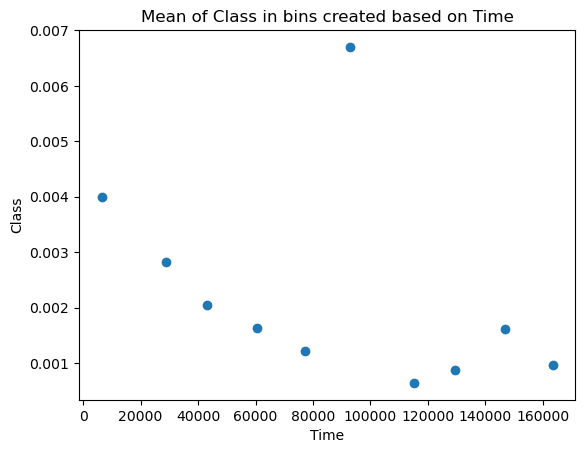

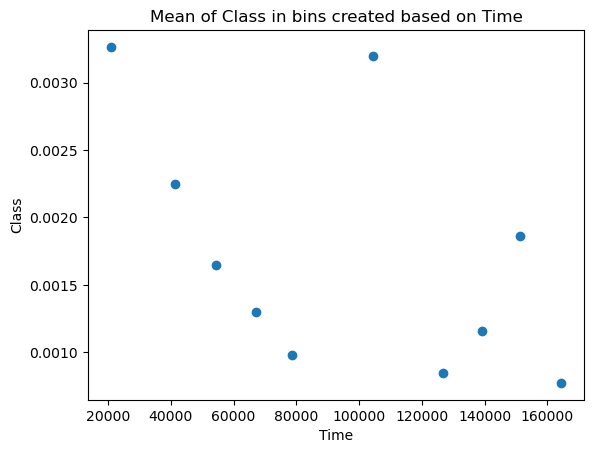

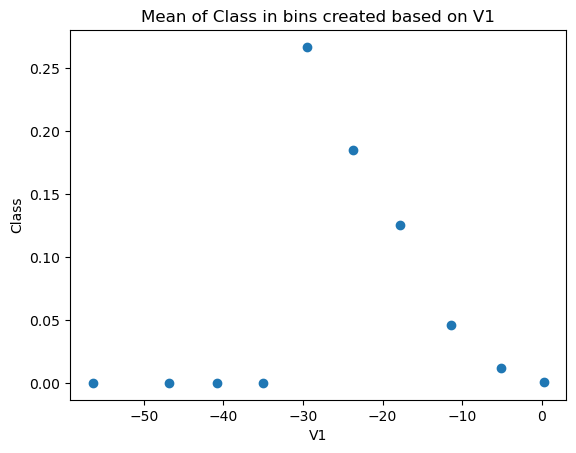

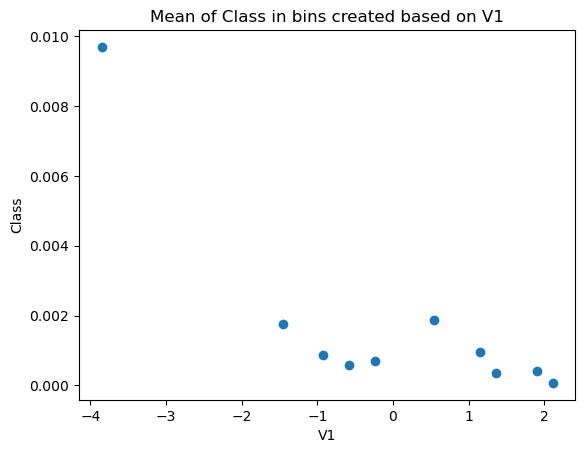

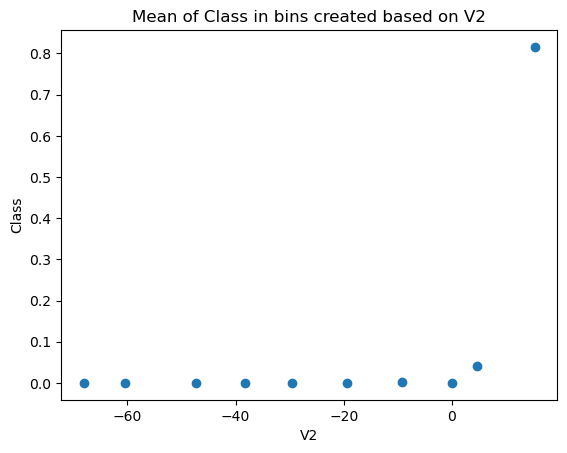

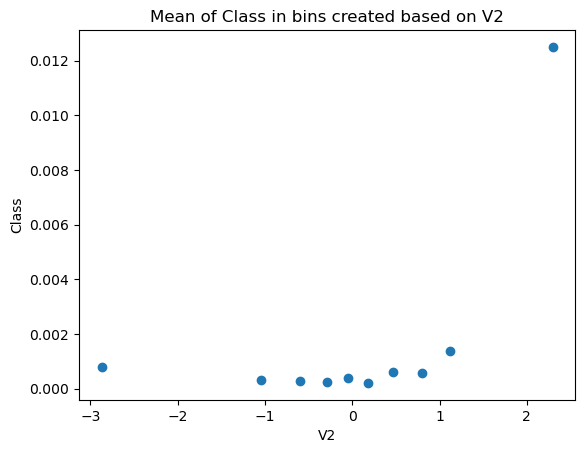

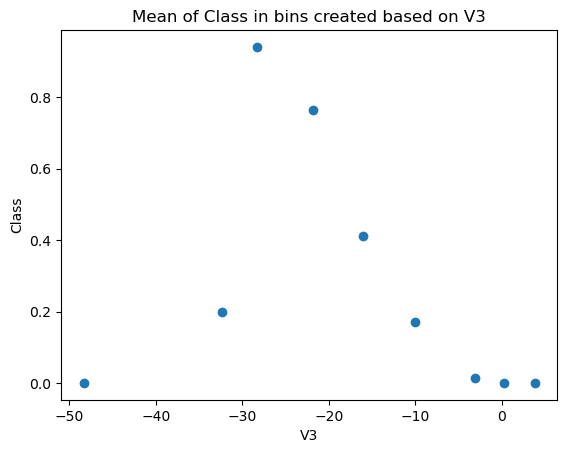

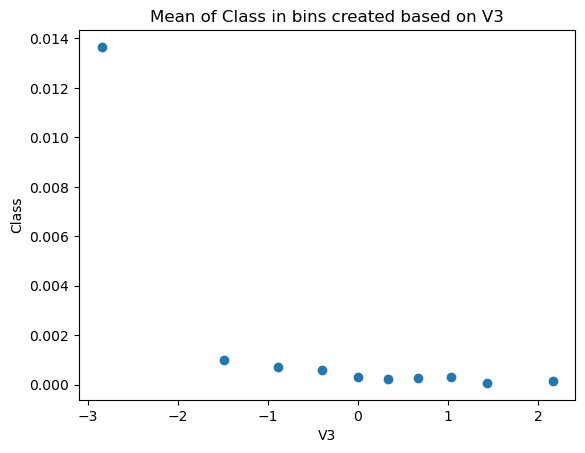

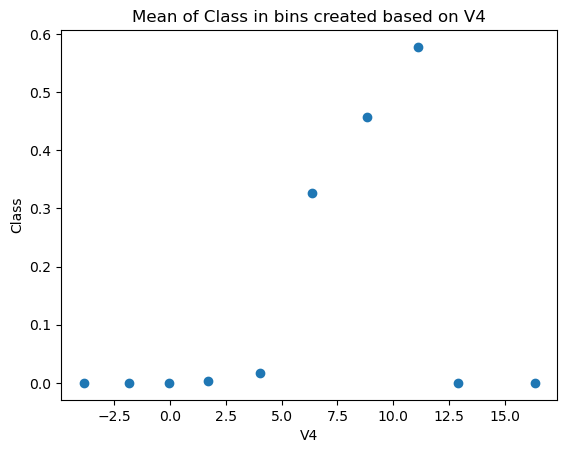

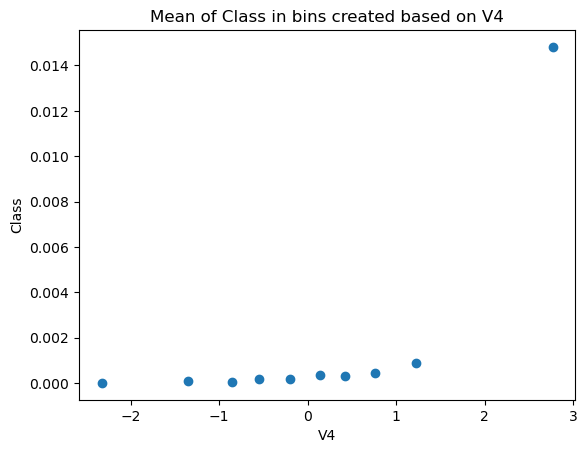

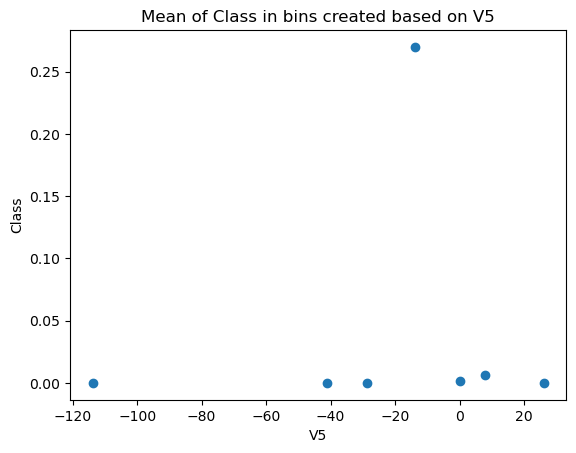

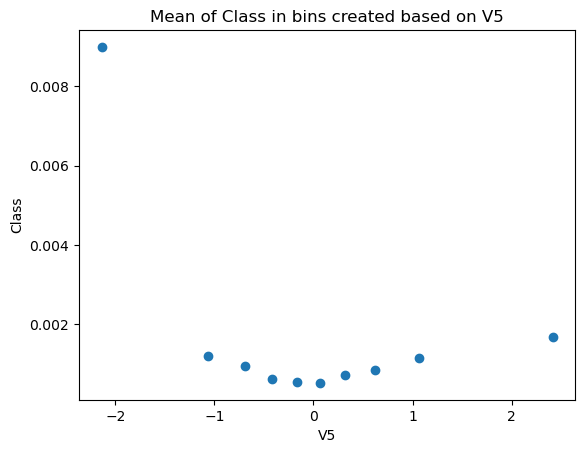

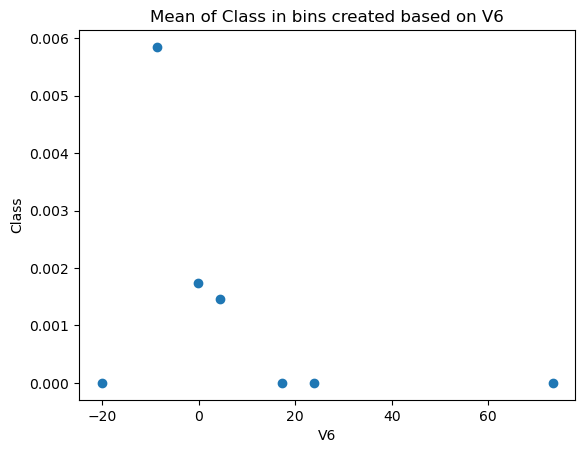

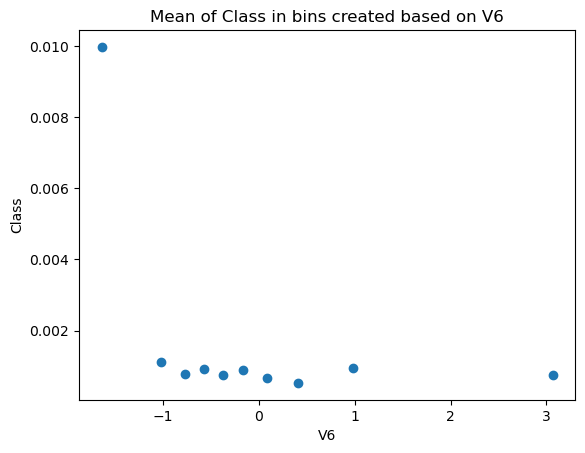

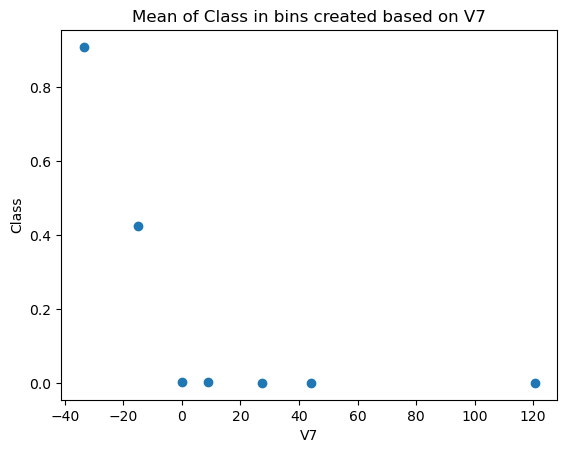

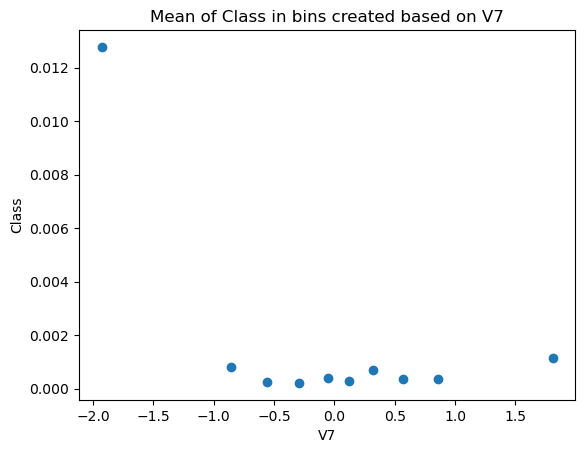

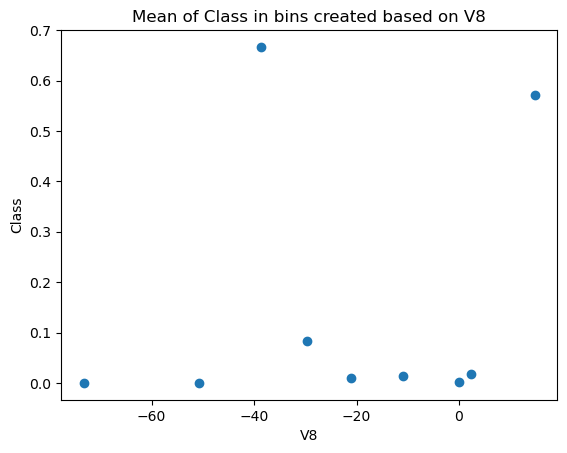

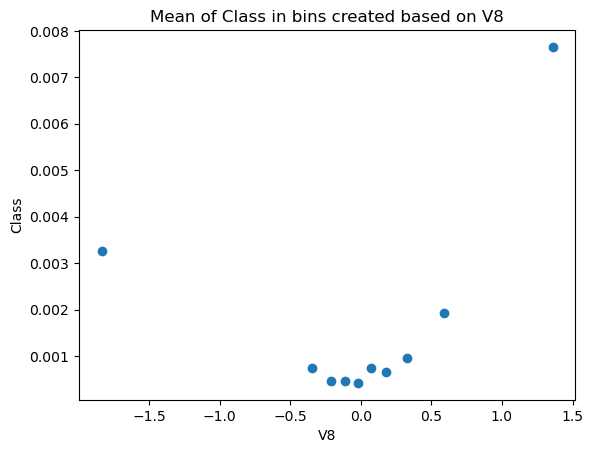

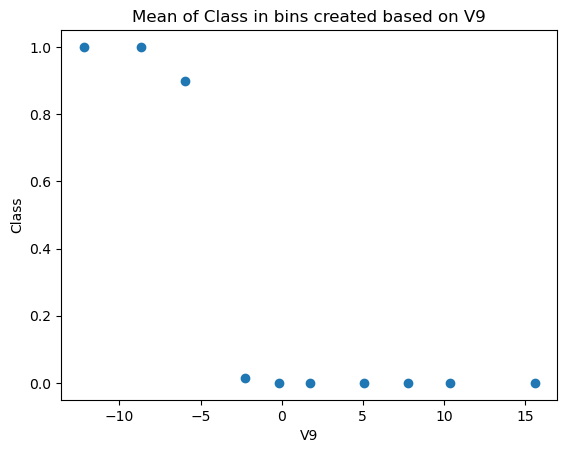

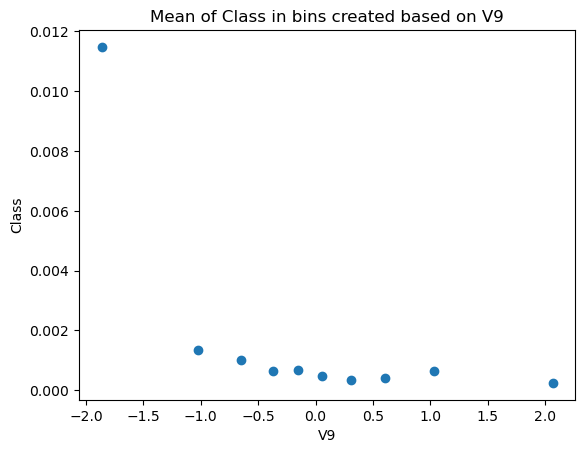

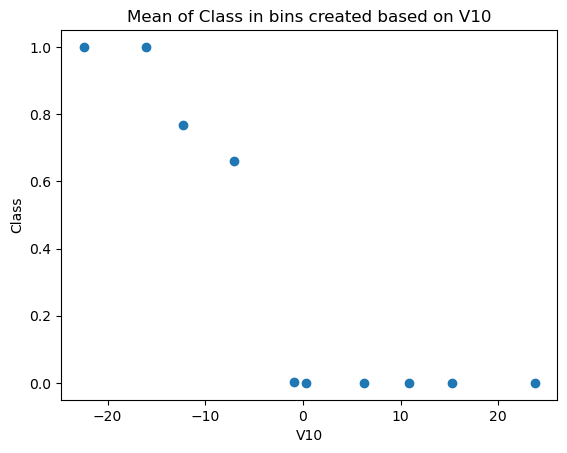

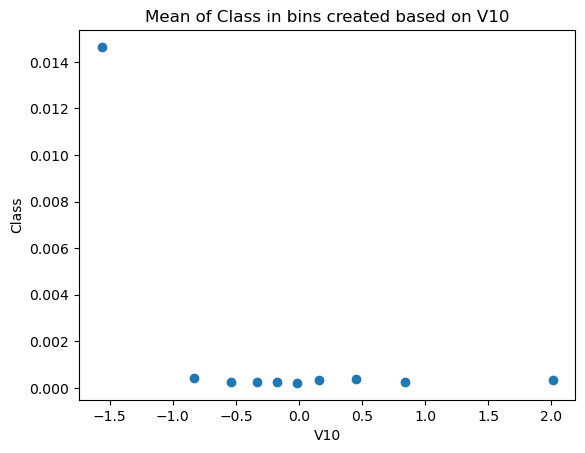

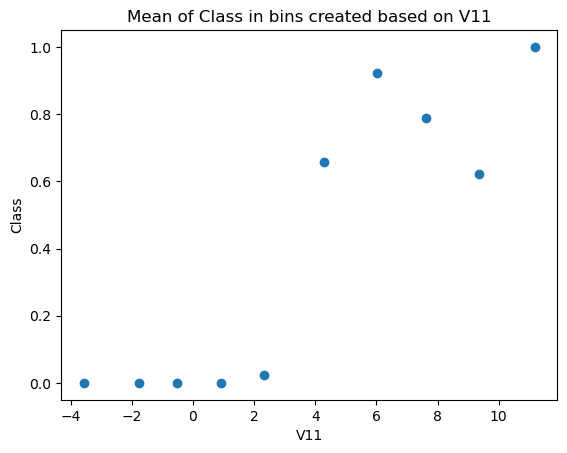

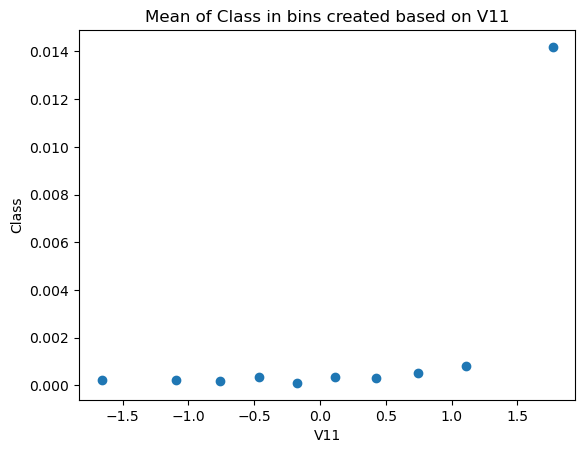

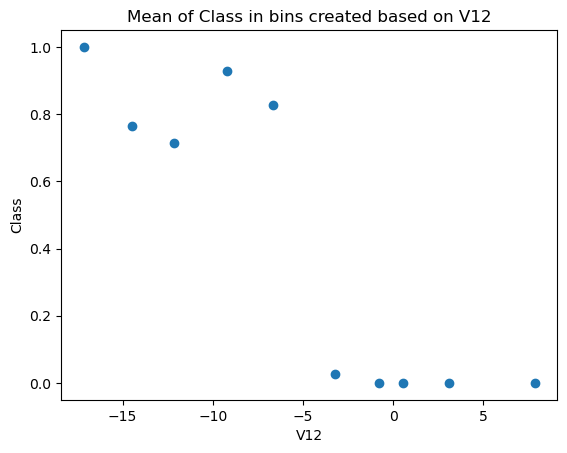

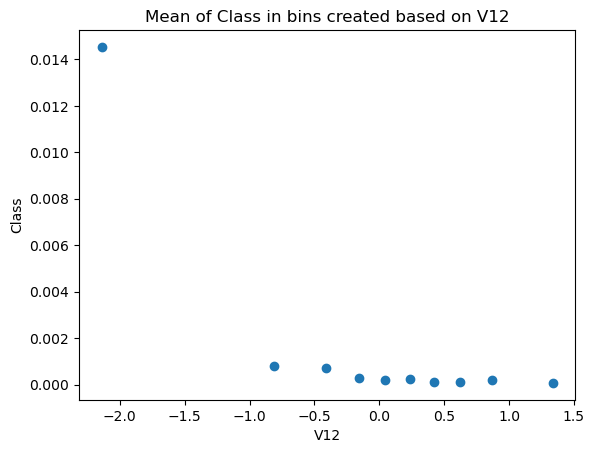

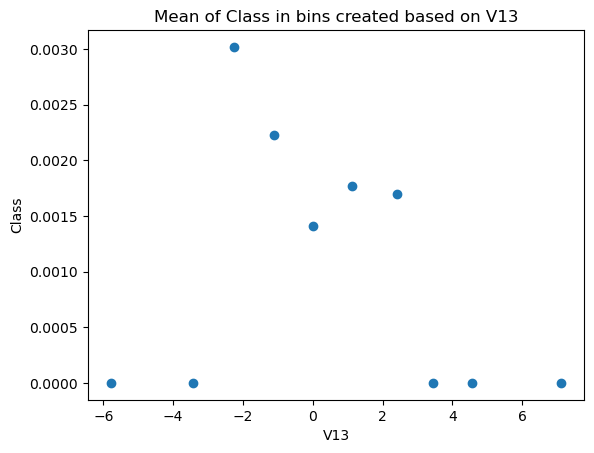

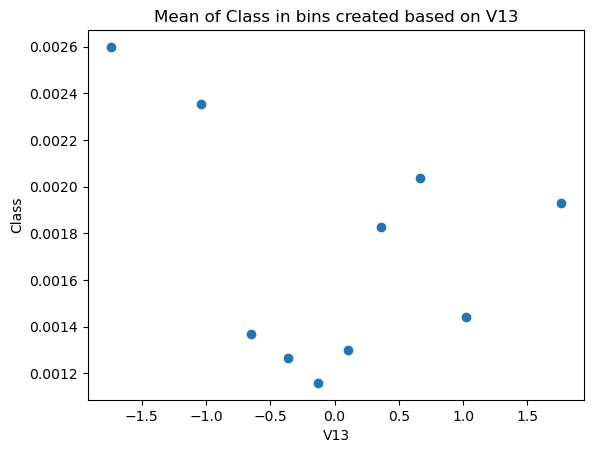

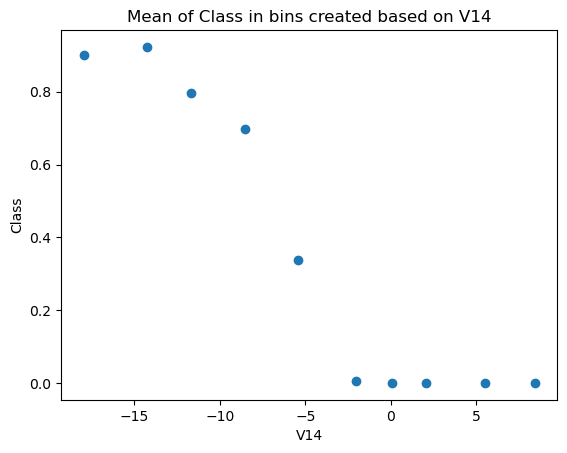

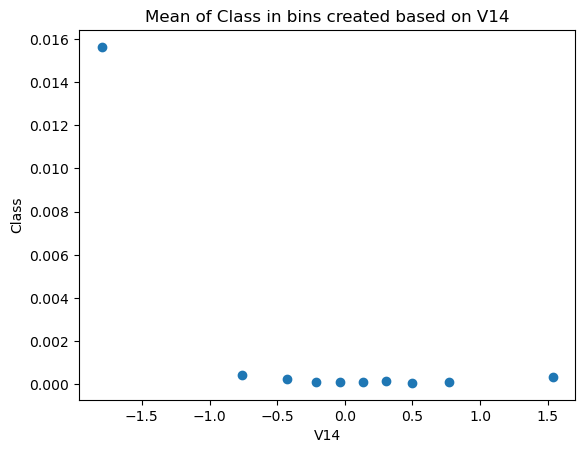

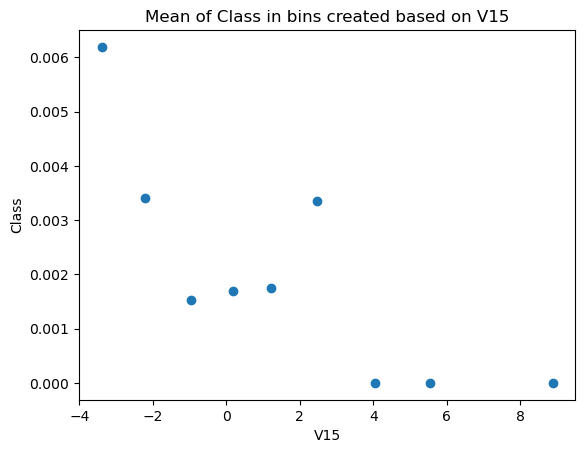

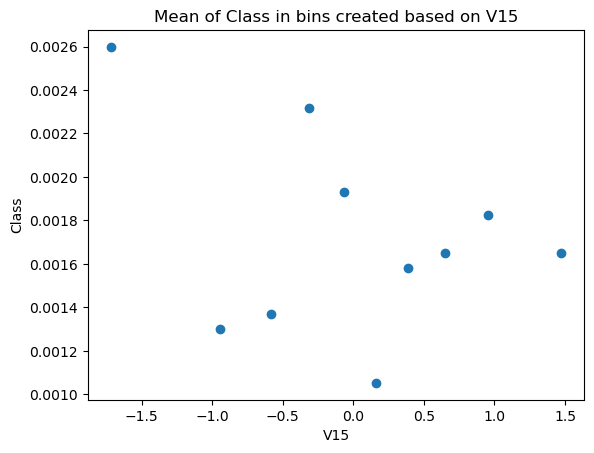

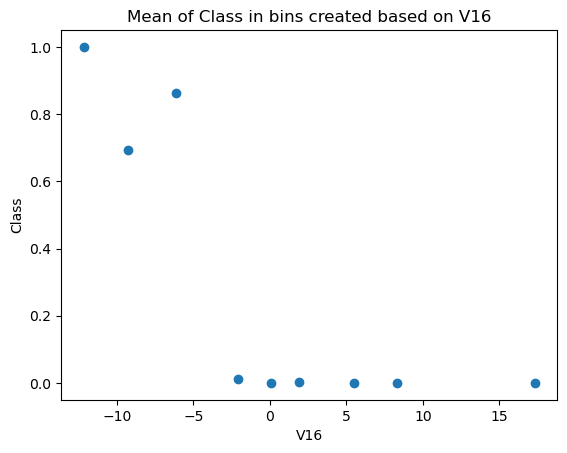

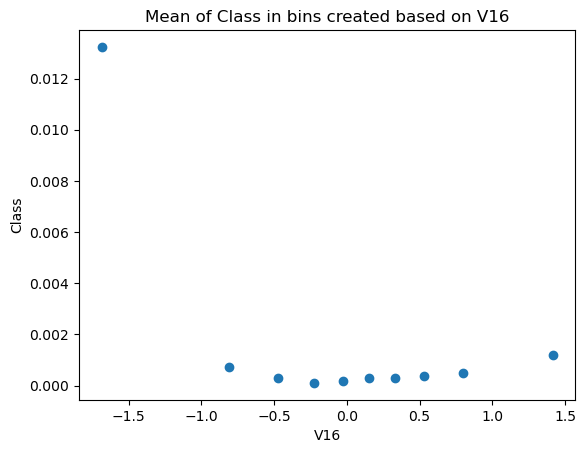

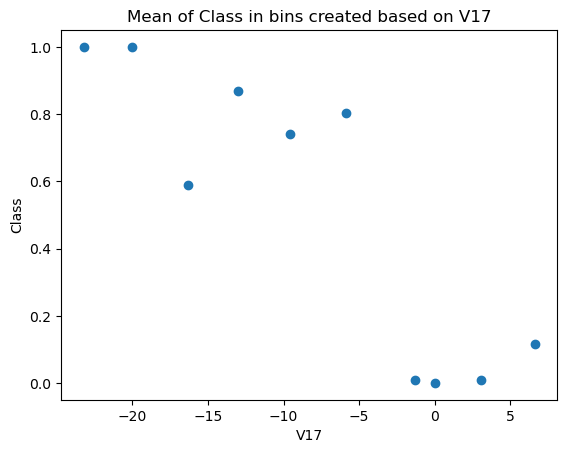

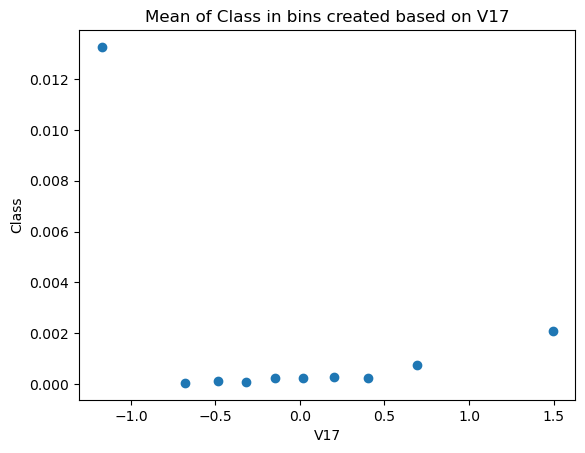

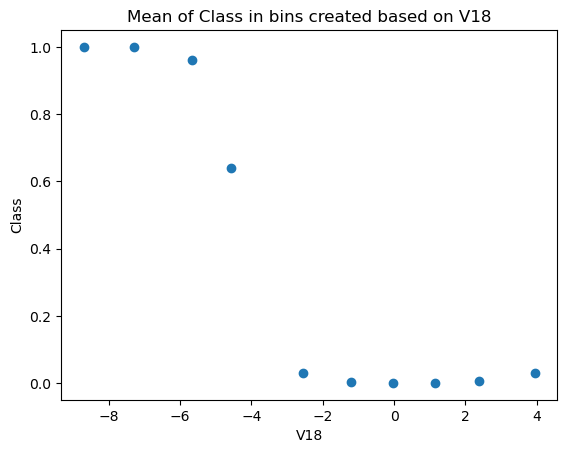

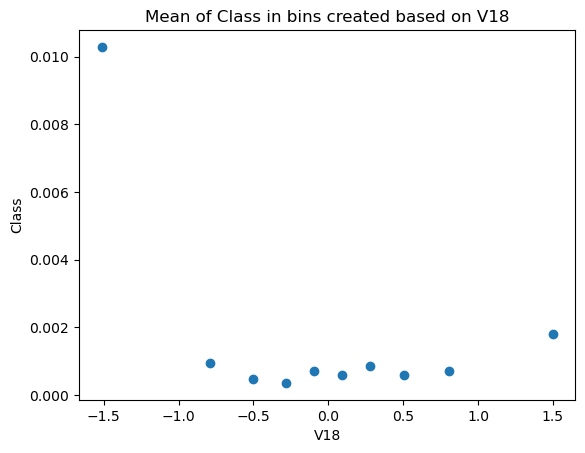

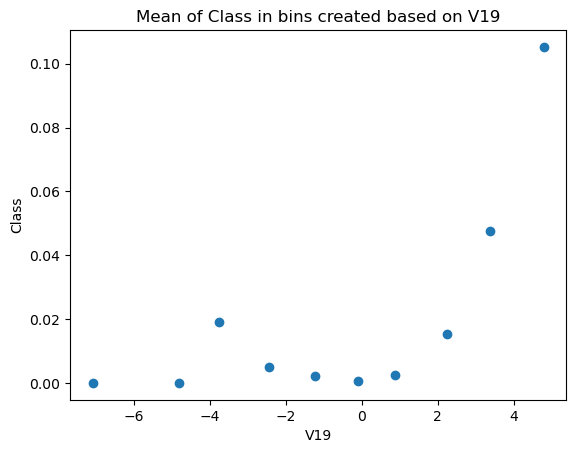

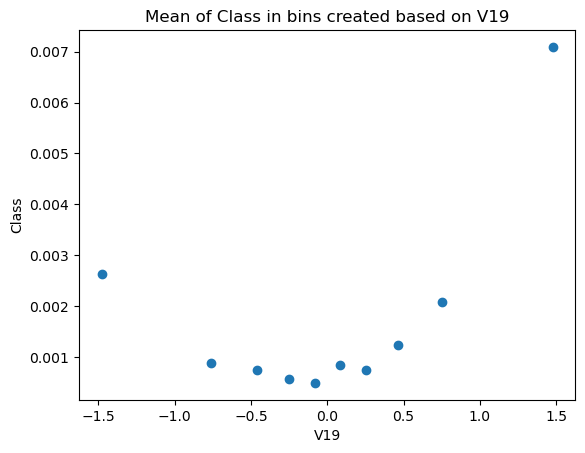

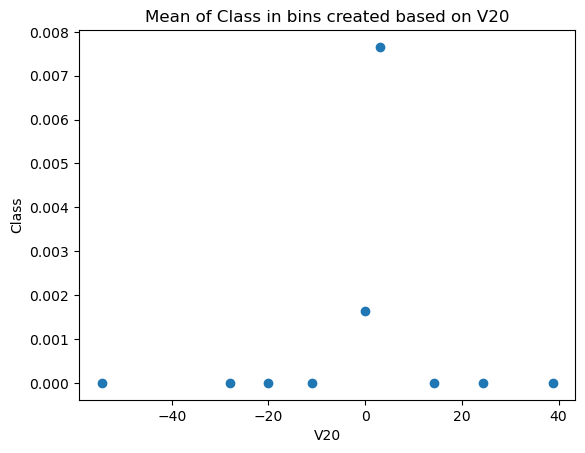

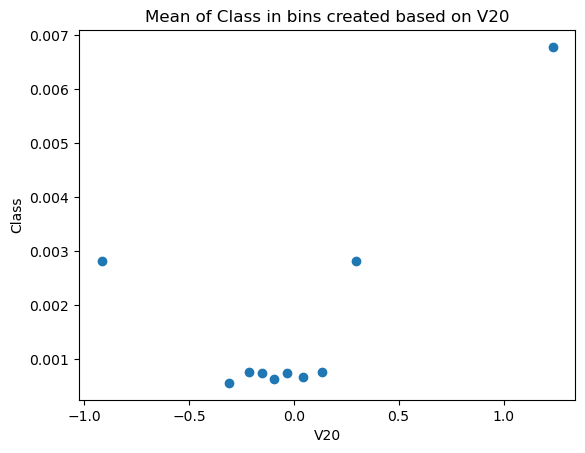

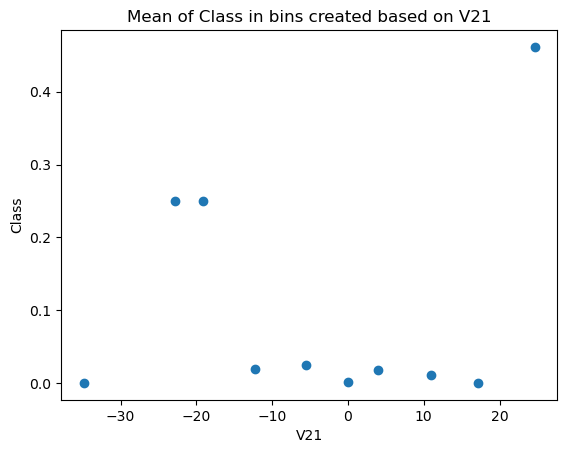

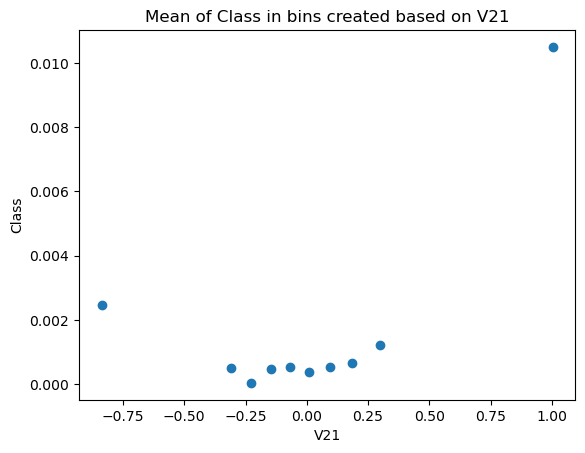

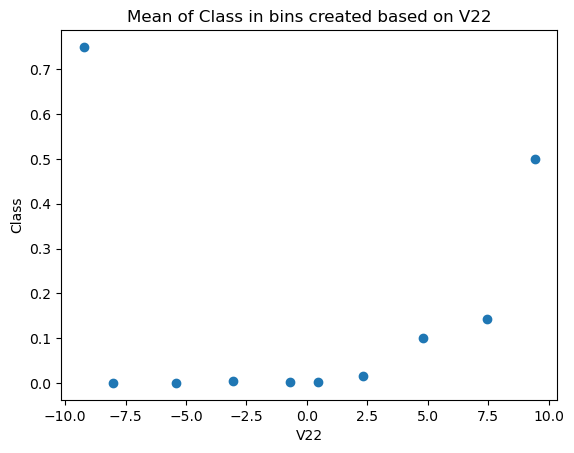

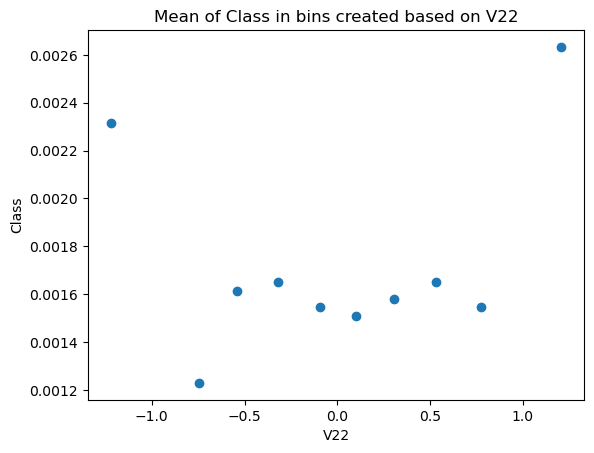

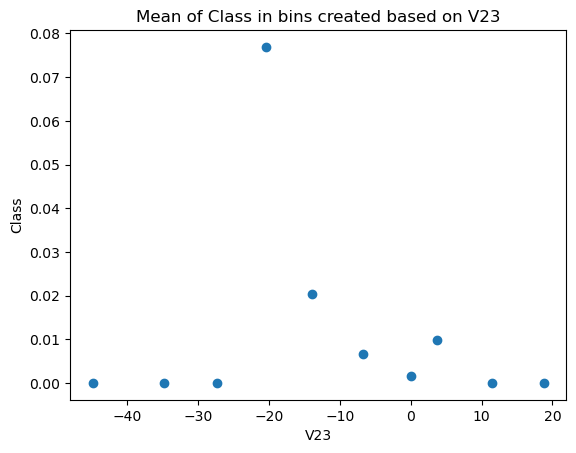

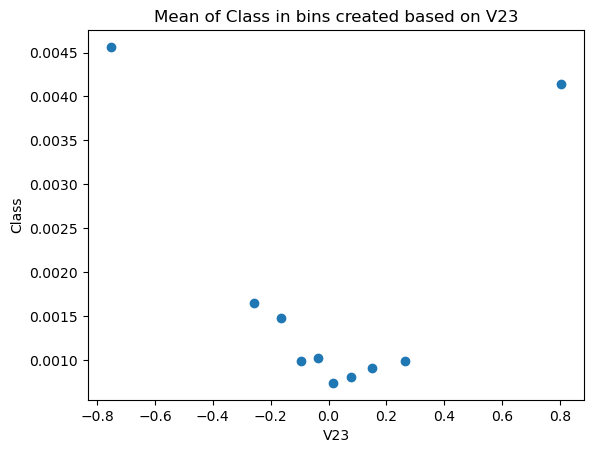

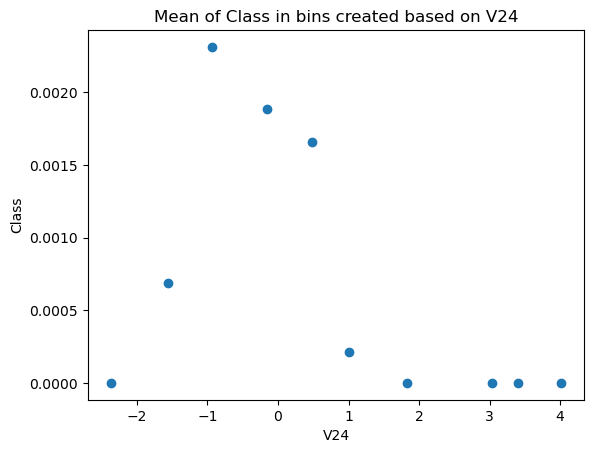

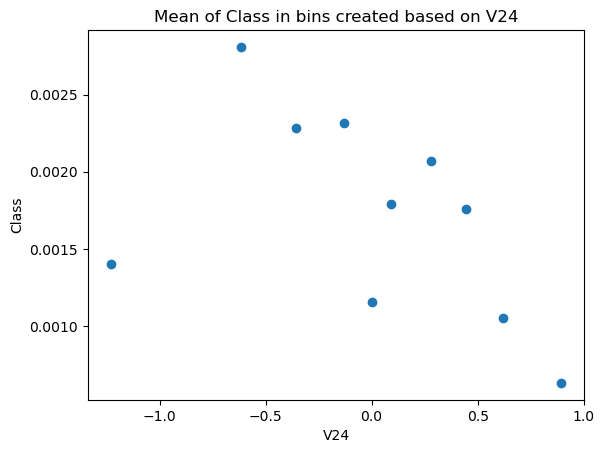

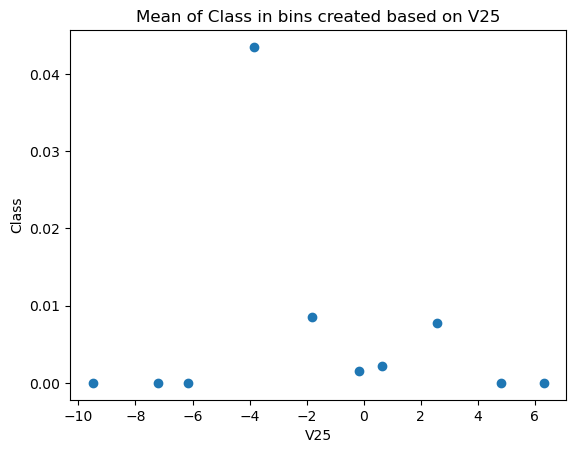

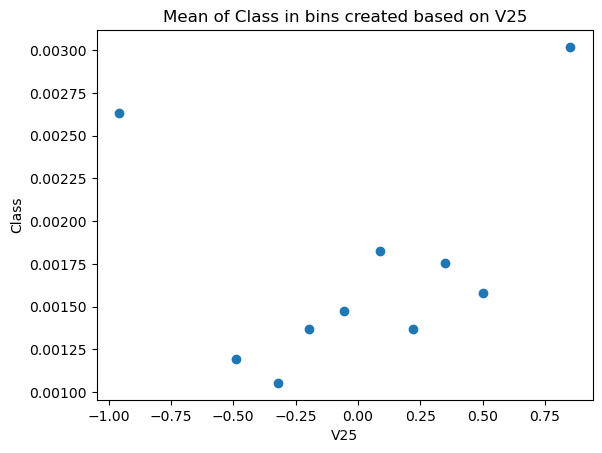

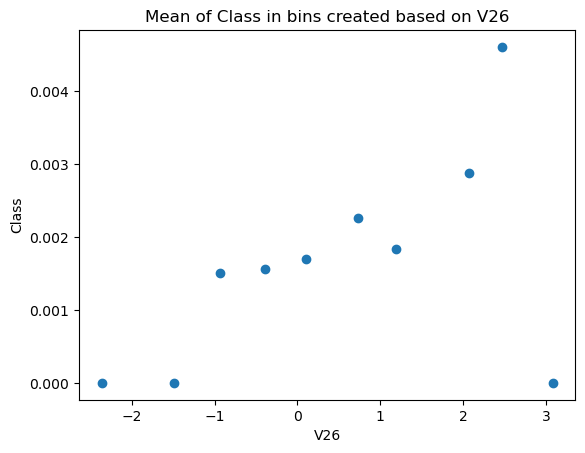

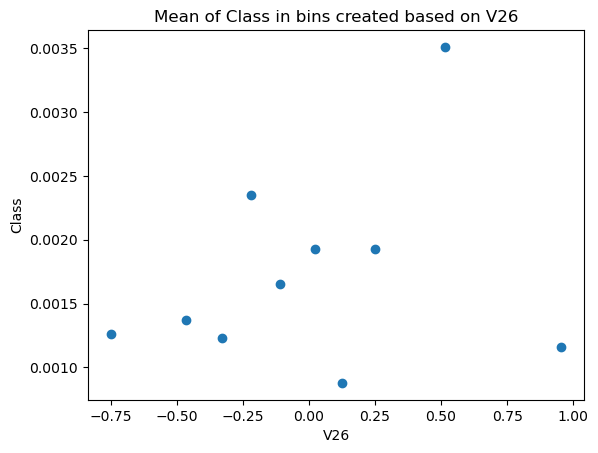

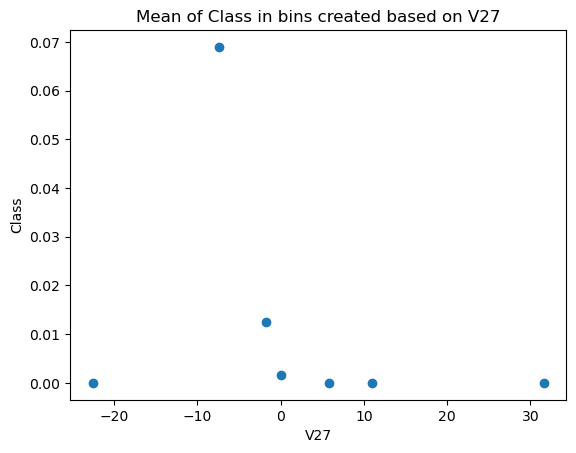

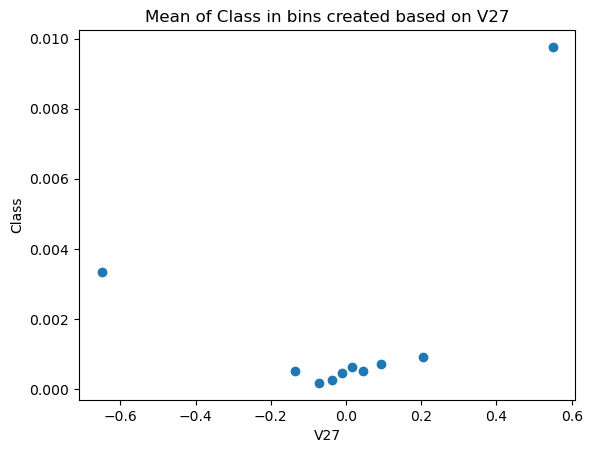

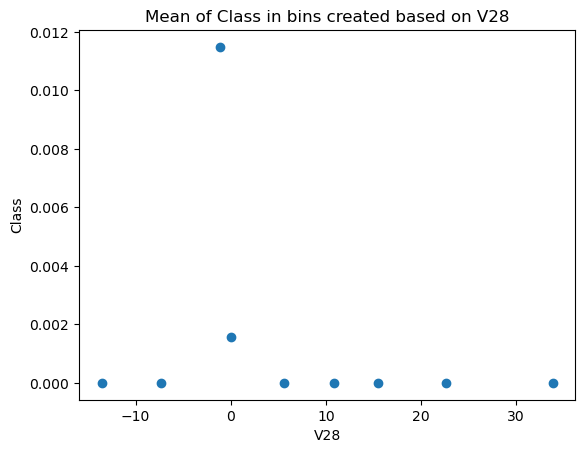

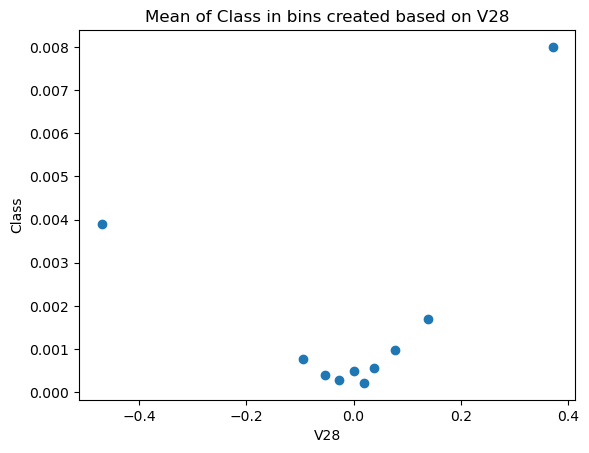

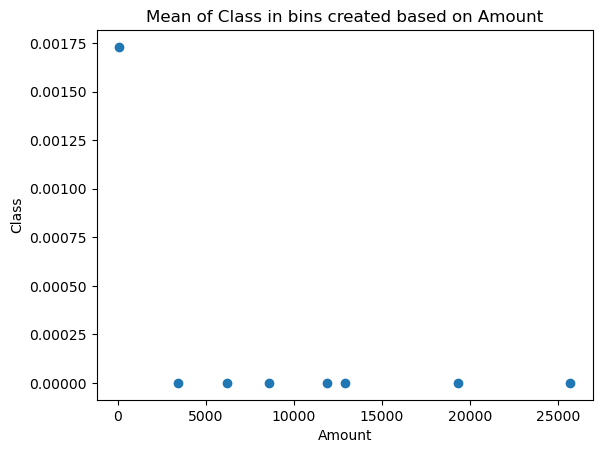

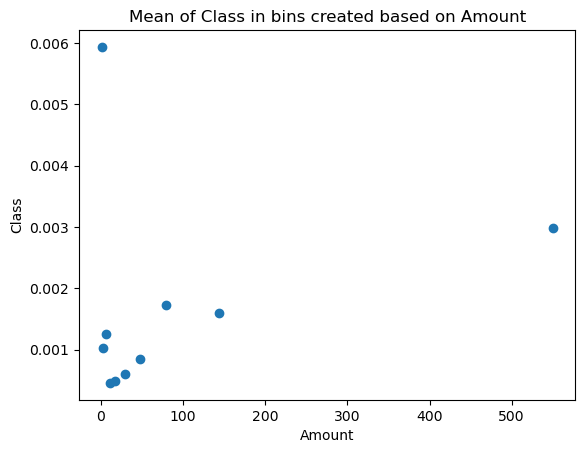

In [92]:
for feature in X_Data.columns:
    table_1 = decile_analysis(df=All_Data,x_feature=feature,y_feature="Class",
                              n_group=10,binning_method='cut',Generate_plot=True)
    table_2 = decile_analysis(df=All_Data,x_feature=feature,y_feature="Class",
                              n_group=10,binning_method='qcut',Generate_plot=True)

In [60]:
X_Data.columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [41]:
x_featurex_

'Time'

In [23]:
df_now_sorted

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,group
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,9
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,9
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,9
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,9


In [8]:
x_train, x_valid, y_train, y_valid = train_test_split()

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64